In [4]:
import random
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(777) # Seed 고정

In [5]:
# Working Dir 변경
WorkingDir = r'C:\Users\ddsa2\개인 작업\6. AI Factory\dataset'
os.chdir(WorkingDir)
os.getcwd()

'C:\\Users\\ddsa2\\개인 작업\\6. AI Factory\\dataset'

In [6]:
train_path = './train_data.csv'
test_path = './test_data.csv'

trainData = pd.read_csv(train_path)
testData = pd.read_csv(test_path)
trainData.head(5)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [7]:
testData.head(5)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


NameError: name 'sns' is not defined

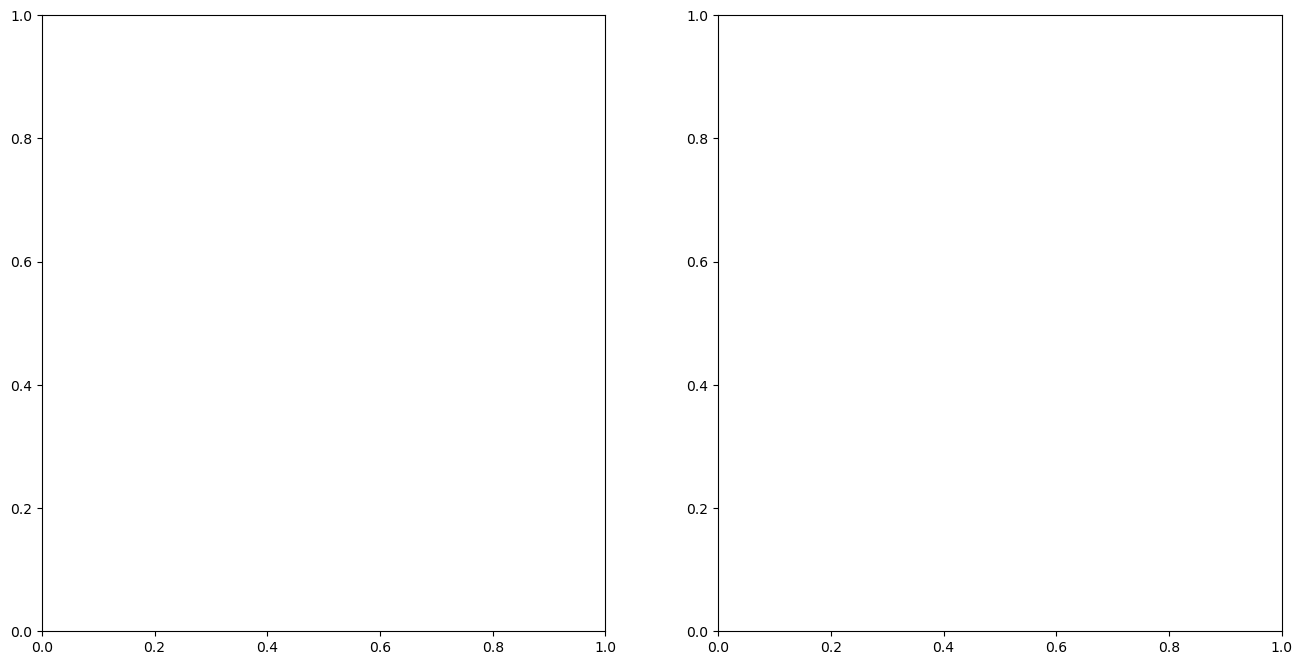

In [8]:
def hist_box_plot(TrainData, features):
    for col in features:        
        data_0 = TrainData.iloc[TrainData.type.values == 0][col]
        data_1 = TrainData.iloc[TrainData.type.values == 1][col]
        data_2 = TrainData.iloc[TrainData.type.values == 2][col]
        data_3 = TrainData.iloc[TrainData.type.values == 3][col]
        data_4 = TrainData.iloc[TrainData.type.values == 4][col]
        data_5 = TrainData.iloc[TrainData.type.values == 5][col]
        data_6 = TrainData.iloc[TrainData.type.values == 6][col]
        data_7 = TrainData.iloc[TrainData.type.values == 7][col]
        
        max_0, min_0, mean_0, median_0 = data_0.max(), data_0.min(), data_0.mean(), data_0.median()
        max_1, min_1, mean_1, median_1 = data_1.max(), data_1.min(), data_1.mean(), data_1.median()
        max_2, min_2, mean_2, median_2 = data_2.max(), data_2.min(), data_2.mean(), data_2.median()
        max_3, min_3, mean_3, median_3 = data_3.max(), data_3.min(), data_3.mean(), data_3.median()
        max_4, min_4, mean_4, median_4 = data_4.max(), data_4.min(), data_4.mean(), data_4.median()
        max_5, min_5, mean_5, median_5 = data_5.max(), data_5.min(), data_5.mean(), data_5.median()
        max_6, min_6, mean_6, median_6 = data_6.max(), data_6.min(), data_6.mean(), data_6.median()
        max_7, min_7, mean_7, median_7 = data_7.max(), data_7.min(), data_7.mean(), data_7.median()
        
        fig, axes = plt.subplots(1,2, figsize = (16,8))
        
        sns.histplot(data = TrainData,
                 x = col,
                 hue = 'type',
                 palette= 'tab10',
                 kde = True,
                 ax = axes[0])
        axes[0].set_title(f'Columns: {col} Histogram')
        
        sns.boxplot(data = TrainData,
                    x = 'type',
                    y = col,
                   ax = axes[1])
        axes[1].set_title(f'Columns: {col} Boxplot')
        
        print(col, max_0, max_1, max_2)
        print(f'{col} 최대값(0/1/2/3/4/5/6/7) : {max_0:.5f}, {max_1:.5f}, {max_2:.5f}, {max_3:.5f}, {max_4:.5f}, {max_5:.5f}, {max_6:.5f}, {max_7:.5f}')
        print(f'{col} 최소값(0/1/2/3/4/5/6/7) : {min_0:.5f}, {min_1:.5f}, {min_2:.5f}, {min_3:.5f}, {min_4:.5f}, {min_5:.5f}, {min_6:.5f}, {min_7:.5f}')
        print(f'{col} 평균값(0/1/2/3/4/5/6/7) : {mean_0:.5f}, {mean_1:.5f}, {mean_2:.5f}, {mean_3:.5f}, {mean_4:.5f}, {mean_5:.5f}, {mean_6:.5f}, {mean_7:.5f}')
        print(f'{col} 최빈값(0/1/2/3/4/5/6/7) : {median_0:.5f}, {median_1:.5f}, {median_2:.5f}, {median_3:.5f}, {median_4:.5f}, {median_5:.5f}, {median_6:.5f}, {median_7:.5f}')
        plt.show()
selected_features = trainData.columns[:-1]
hist_box_plot(trainData, selected_features)

air_inflow 3.36 2.08 0.99
air_inflow 최대값(0/1/2/3/4/5/6/7) : 3.36000, 2.08000, 0.99000, 6.24000, 3.37000, 3.37000, 3.36000, 3.36000
air_inflow 최소값(0/1/2/3/4/5/6/7) : 0.92000, 0.70000, 0.34000, 2.10000, 1.14000, 1.03000, 0.88000, 1.13000
air_inflow 평균값(0/1/2/3/4/5/6/7) : 2.20728, 1.39762, 0.65620, 4.13013, 2.25081, 2.21625, 2.22195, 2.21986
air_inflow 최빈값(0/1/2/3/4/5/6/7) : 2.20000, 1.40000, 0.65000, 4.10500, 2.21000, 2.18000, 2.24000, 2.20000


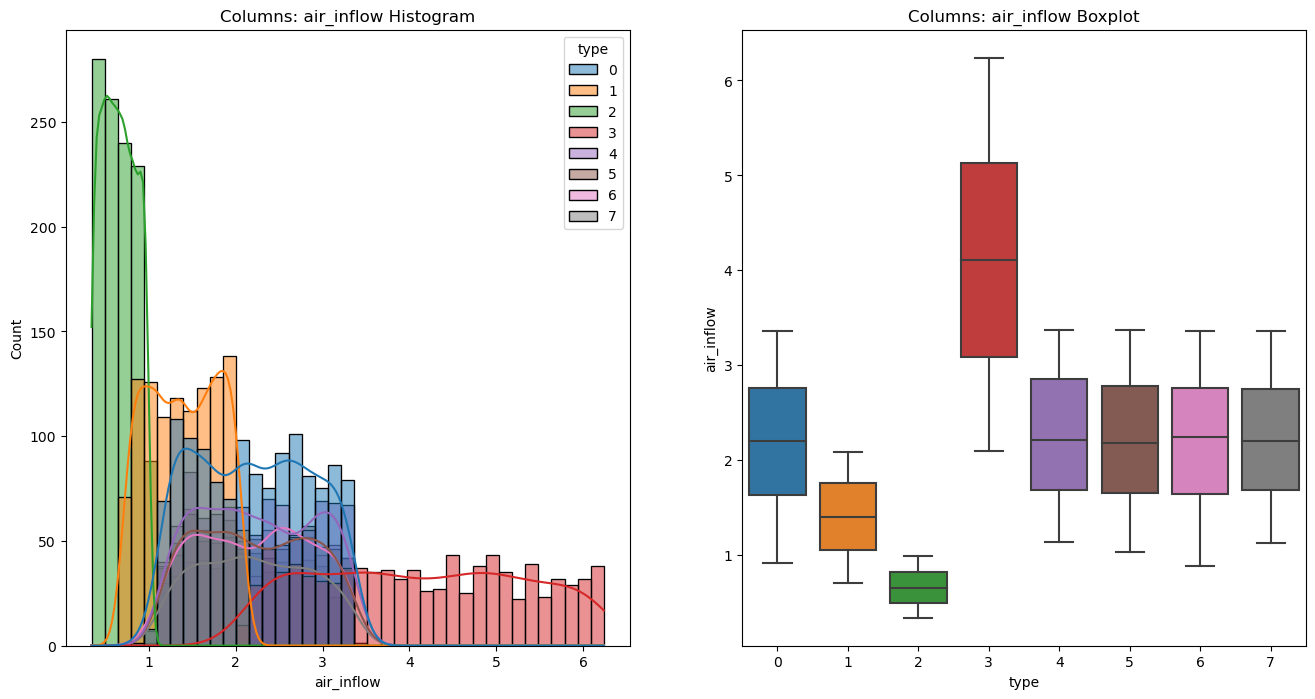

air_end_temp 65.54 62.51 61.48
air_end_temp 최대값(0/1/2/3/4/5/6/7) : 65.54000, 62.51000, 61.48000, 65.05000, 64.54000, 64.55000, 64.50000, 64.48000
air_end_temp 최소값(0/1/2/3/4/5/6/7) : 35.00000, 33.01000, 32.08000, 35.51000, 35.04000, 35.05000, 35.08000, 35.00000
air_end_temp 평균값(0/1/2/3/4/5/6/7) : 49.74165, 47.94836, 46.54859, 50.09362, 49.85512, 49.51331, 50.08238, 49.41125
air_end_temp 최빈값(0/1/2/3/4/5/6/7) : 49.52500, 48.00000, 46.16000, 49.90000, 49.47500, 48.98000, 50.64000, 49.11000


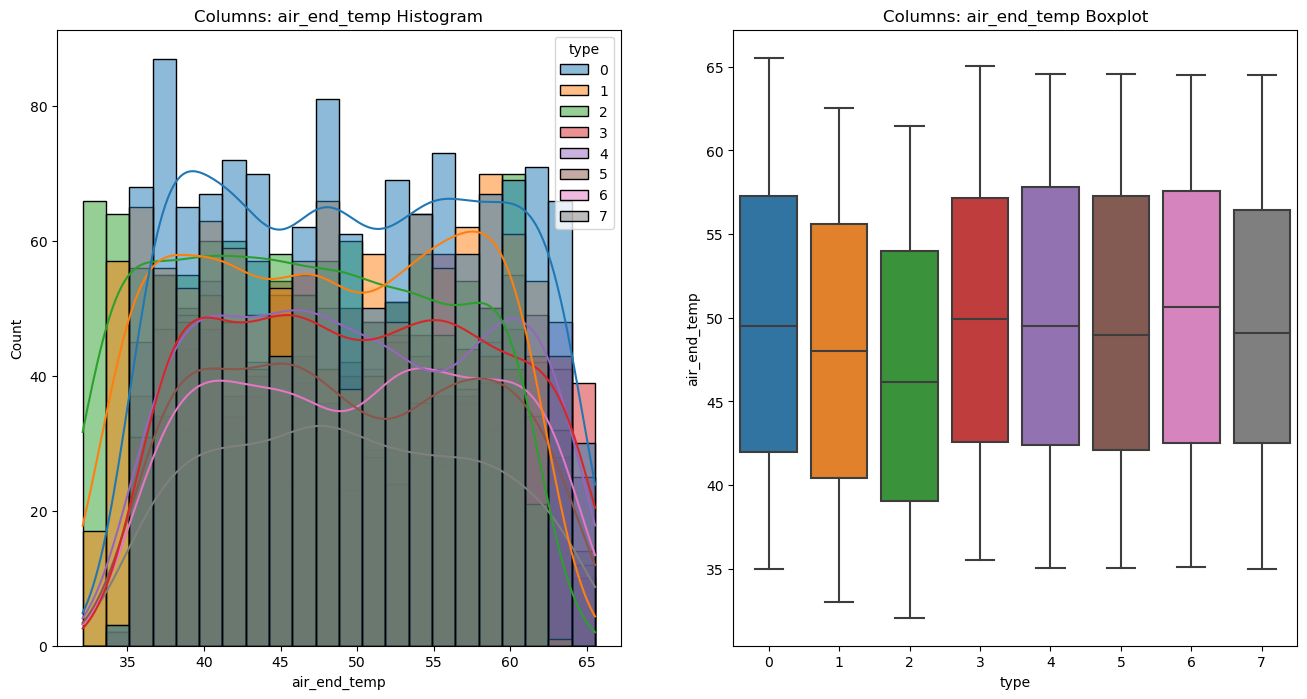

out_pressure 0.7 0.7 0.7
out_pressure 최대값(0/1/2/3/4/5/6/7) : 0.70000, 0.70000, 0.70000, 0.70000, 0.70000, 0.70000, 0.70000, 0.70000
out_pressure 최소값(0/1/2/3/4/5/6/7) : 0.70000, 0.70000, 0.70000, 0.70000, 0.49000, 0.70000, 0.70000, 0.70000
out_pressure 평균값(0/1/2/3/4/5/6/7) : 0.70000, 0.70000, 0.70000, 0.70000, 0.69871, 0.70000, 0.70000, 0.70000
out_pressure 최빈값(0/1/2/3/4/5/6/7) : 0.70000, 0.70000, 0.70000, 0.70000, 0.70000, 0.70000, 0.70000, 0.70000


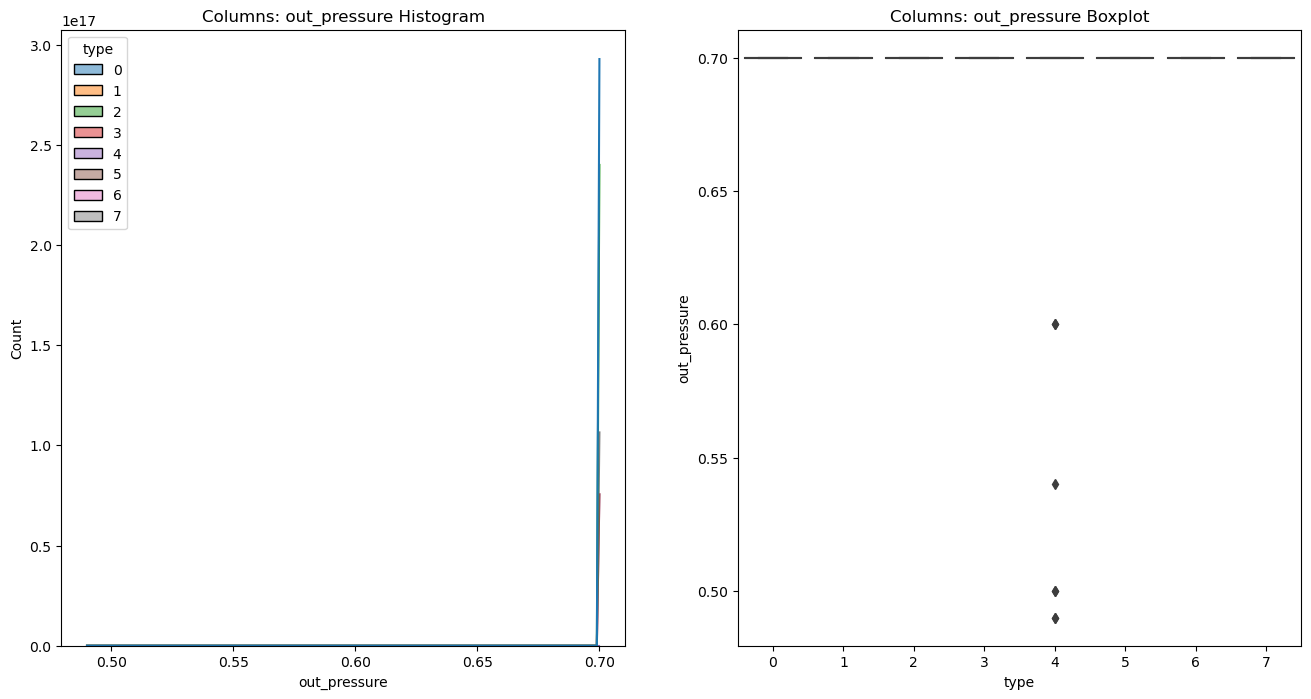

motor_current 45.53 30.66 17.37
motor_current 최대값(0/1/2/3/4/5/6/7) : 45.53000, 30.66000, 17.37000, 74.00000, 43.55000, 43.59000, 44.47000, 43.49000
motor_current 최소값(0/1/2/3/4/5/6/7) : 14.67000, 10.34000, 5.37000, 24.00000, 14.70000, 14.72000, 14.74000, 14.67000
motor_current 평균값(0/1/2/3/4/5/6/7) : 29.11135, 20.63039, 10.55242, 48.01634, 29.15330, 28.86988, 29.42926, 28.75846
motor_current 최빈값(0/1/2/3/4/5/6/7) : 28.87000, 20.67000, 10.49000, 48.00000, 28.71500, 28.33000, 29.87000, 28.46000


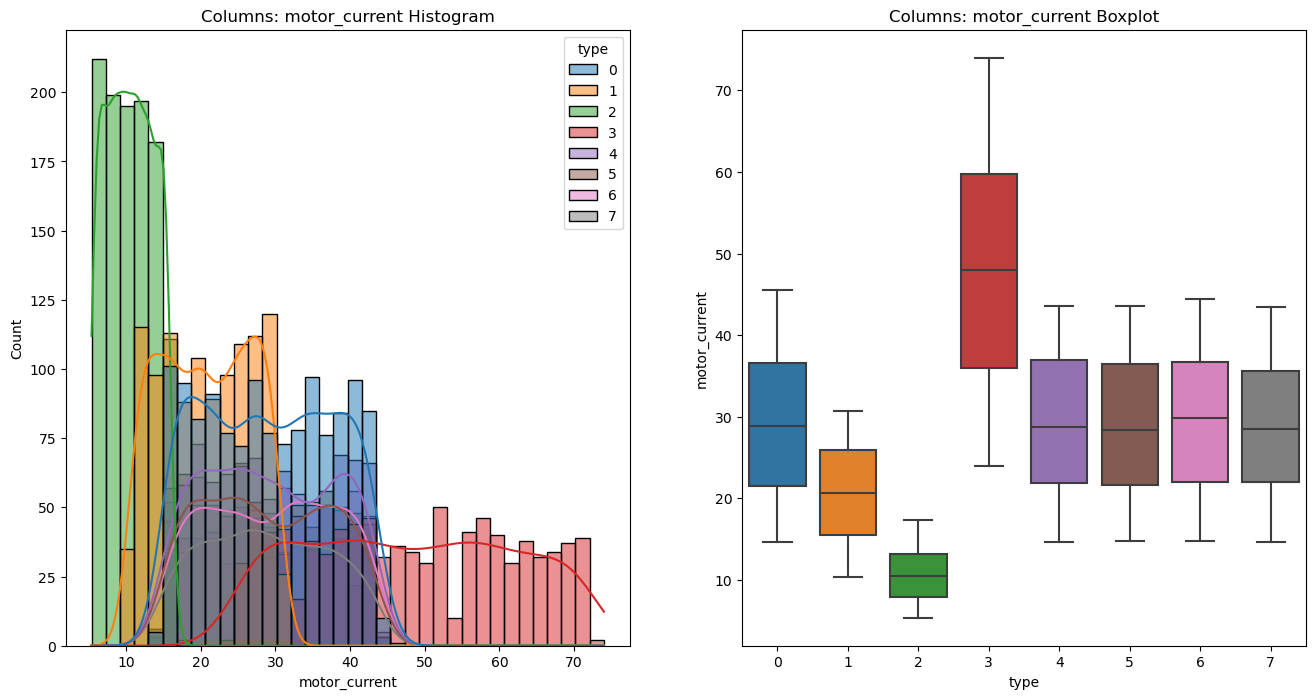

motor_rpm 3563.0 3561.0 3558.0
motor_rpm 최대값(0/1/2/3/4/5/6/7) : 3563.00000, 3561.00000, 3558.00000, 3564.00000, 3563.00000, 3564.00000, 3559.00000, 3558.00000
motor_rpm 최소값(0/1/2/3/4/5/6/7) : 1200.00000, 1201.00000, 1206.00000, 1201.00000, 1203.00000, 1204.00000, 1206.00000, 1200.00000
motor_rpm 평균값(0/1/2/3/4/5/6/7) : 2368.98765, 2395.77416, 2365.93443, 2363.02397, 2385.25817, 2357.74833, 2392.67604, 2352.22222
motor_rpm 최빈값(0/1/2/3/4/5/6/7) : 2347.50000, 2400.00000, 2334.50000, 2348.50000, 2349.50000, 2312.00000, 2435.00000, 2328.50000


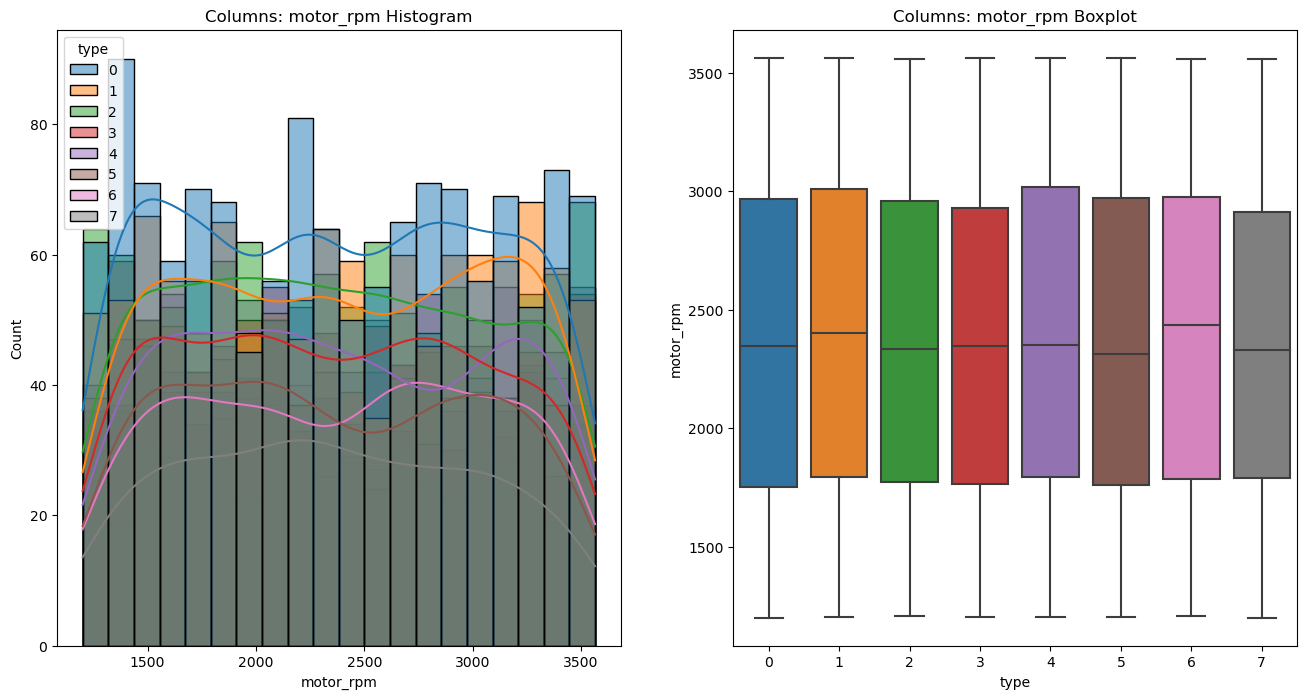

motor_temp 79.59 77.57 76.59
motor_temp 최대값(0/1/2/3/4/5/6/7) : 79.59000, 77.57000, 76.59000, 82.39000, 79.59000, 79.60000, 79.54000, 79.53000
motor_temp 최소값(0/1/2/3/4/5/6/7) : 53.33000, 51.34000, 50.42000, 54.34000, 53.37000, 53.38000, 53.40000, 53.33000
motor_temp 평균값(0/1/2/3/4/5/6/7) : 66.30005, 64.61970, 63.33394, 67.36897, 66.50280, 66.19734, 66.58557, 66.13595
motor_temp 최빈값(0/1/2/3/4/5/6/7) : 66.06500, 64.67000, 63.07500, 67.17000, 66.10500, 65.69000, 67.06000, 65.87000


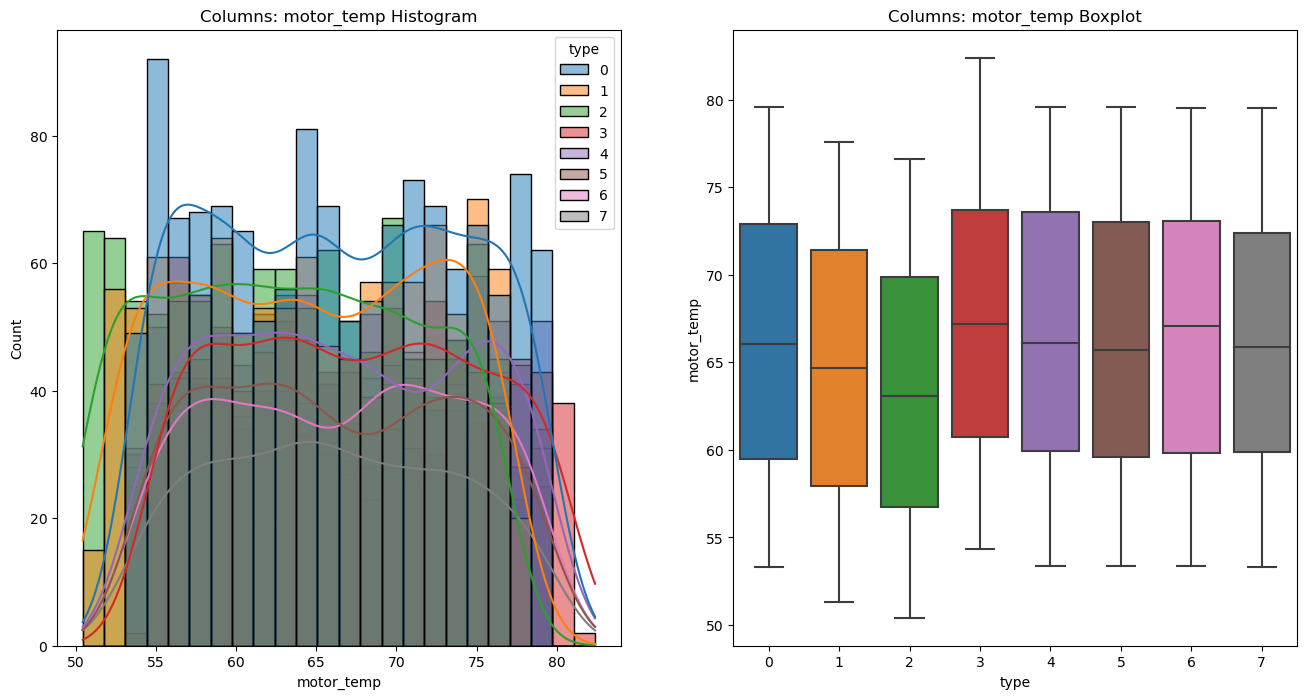

motor_vibe 4.19 3.78 3.28
motor_vibe 최대값(0/1/2/3/4/5/6/7) : 4.19000, 3.78000, 3.28000, 6.26000, 3.98000, 4.10000, 4.13000, 4.04000
motor_vibe 최소값(0/1/2/3/4/5/6/7) : 2.67000, 2.47000, 1.97000, 3.87000, 2.67000, 2.67000, 2.67000, 2.67000
motor_vibe 평균값(0/1/2/3/4/5/6/7) : 3.34062, 3.13136, 2.61338, 4.54015, 3.32550, 3.31822, 3.35897, 3.30857
motor_vibe 최빈값(0/1/2/3/4/5/6/7) : 3.33000, 3.13000, 2.60000, 4.52000, 3.30500, 3.30000, 3.38000, 3.30000


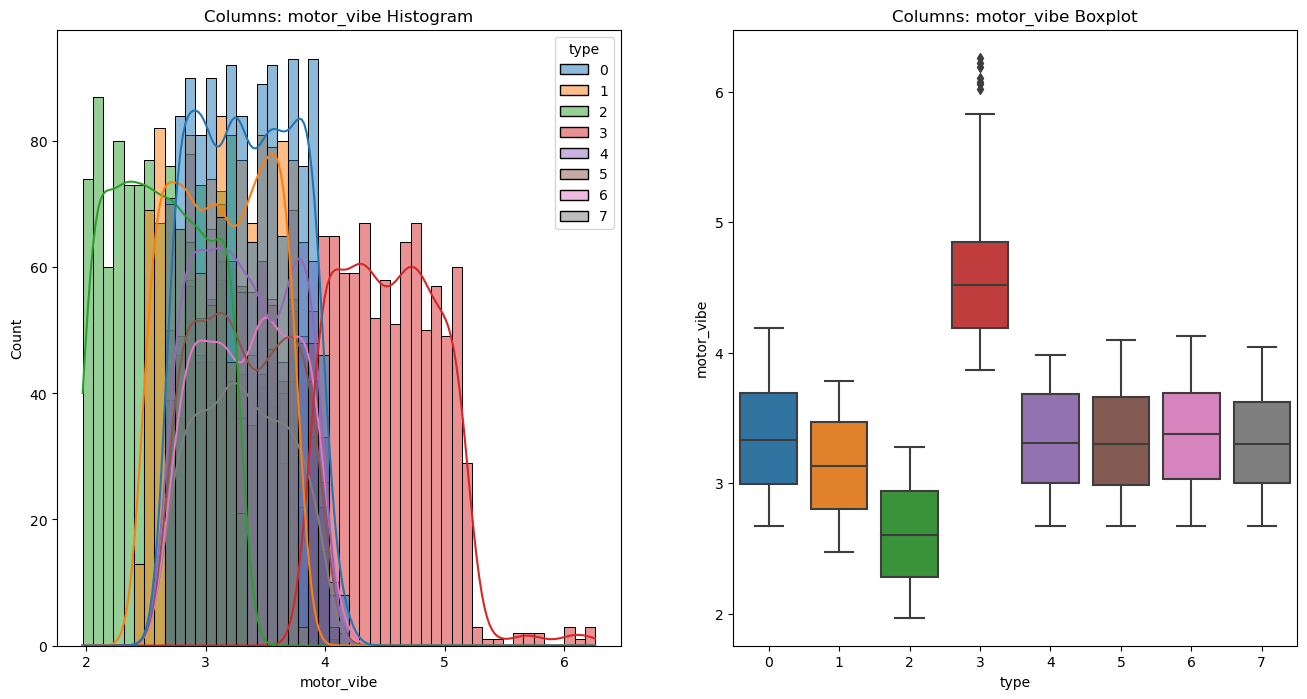

In [131]:
hist_box_plot(testData, selected_features)

In [17]:
# type 1 -> motor_vibration 10 이상 제거
# pressure: trainData(0.7)/ testData(0.49, 0.5 , 0.54, 0.6 , 0.7)
# --> pressure는 제거하고 진행, 향후 압력 기준으로 데이터 증강 필요
# 무차원수 개발
# 데이터 분석 요구
# testData 분포와 비교해봤을 때, 비슷한 분포를 가짐

'''
설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
설비 번호 1: 20HP
설비 번호 2: 10HP
설비 번호 3: 50HP
'''

'''
type 별로 데이터 개수
0    432 30HP(마력)
--------
1    369 20HP(마력)
--------
2    366 10HP(마력)
--------
3    306 50HP(마력)
--------
4    306 30HP(마력)
5    249 30HP(마력)
6    249 30HP(마력)
7    186 30HP(마력)
4,5,6,7 -> 990
'''

990

In [9]:
def preprocessing(df_):
    df = df_.copy()
    '''
    preprocessing: outlier 제거, 마력 수준에 맞게 분할
    '''
    
    # type 1 -> motor_vibration 10 이상 제거
    df_type_1 = df.loc[df.type == 1]
    df_type_1_outofdist_index = df_type_1.loc[df_type_1.motor_vibe.values > 10.0].index
    df.drop(index = df_type_1_outofdist_index, inplace = True)
    
    # 마력수준에 따른 데이터분할
    # 마력 10: type 2
    # 마력 20: type 1
    # 마력 30: type 0, 4, 5, 6, 7
    # 마력 50: type 3
    
    df_0_power30 = df.loc[df.type == 0]
    df_1_power20 = df.loc[df.type == 1]
    df_2_power10 = df.loc[df.type == 2]
    df_3_power50 = df.loc[df.type == 3]
    df_4_power30 = df.loc[df.type == 4]
    df_5_power30 = df.loc[df.type == 5]
    df_6_power30 = df.loc[df.type == 6]
    df_7_power30 = df.loc[df.type == 7]
    
    df_power10 = df_2_power10
    df_power20 = df_1_power20
    df_power30 = pd.concat([df_0_power30, df_4_power30, df_5_power30, df_6_power30, df_7_power30], axis = 0)
    df_power50 = df_3_power50
    
    # drop out_pressure columns
    df_power10.drop(columns = ['out_pressure', 'type'], inplace = True)
    df_power20.drop(columns = ['out_pressure', 'type'], inplace = True)
    df_power30.drop(columns = ['out_pressure', 'type'], inplace = True)
    df_power50.drop(columns = ['out_pressure', 'type'], inplace = True)
    return df_power10, df_power20, df_power30, df_power50

trainData_power10, trainData_power20, trainData_power30, trainData_power50 = preprocessing(trainData)
testData_power10, testData_power20, testData_power30, testData_power50 = preprocessing(testData)
trainData_power10.shape, trainData_power20.shape, trainData_power30.shape, trainData_power50.shape

((366, 6), (353, 6), (1422, 6), (306, 6))

In [10]:
from sklearn.preprocessing import StandardScaler
power_10 = StandardScaler()
power_20 = StandardScaler()
power_30 = StandardScaler()
power_50 = StandardScaler()

power_10.fit(trainData_power10)
power_20.fit(trainData_power20)
power_30.fit(trainData_power30)
power_50.fit(trainData_power50)

trainData_power10_scaled = power_10.transform(trainData_power10)
testData_power10_scaled = power_10.transform(testData_power10)

trainData_power20_scaled = power_20.transform(trainData_power20)
testData_power20_scaled = power_20.transform(testData_power20)

trainData_power30_scaled = power_30.transform(trainData_power30)
testData_power30_scaled = power_30.transform(testData_power30)

trainData_power50_scaled = power_50.transform(trainData_power50)
testData_power50_scaled = power_50.transform(testData_power50)

In [11]:
from sklearn.decomposition import PCA

pca_10 = PCA(n_components = trainData_power10_scaled.shape[1]) # 주성분을 몇개로 할지 결정
result_10 = pca_10.fit_transform(trainData_power10_scaled)
print(pca_10.explained_variance_ratio_.sum(), result_10.shape)
# 주성분으로 이루어진 데이터 프레임 구성

0.9999999999999998 (366, 6)


In [12]:
PCA_Train_10 = pd.DataFrame(result_10)
PCA_Test_10 = pca_10.transform(testData_power10_scaled)
PCA_Train_10.shape,PCA_Test_10.shape

((366, 6), (1098, 6))

In [13]:
from sklearn.decomposition import PCA

pca_20 = PCA(n_components = trainData_power20_scaled.shape[1]) # 주성분을 몇개로 할지 결정
result_20 = pca_20.fit_transform(trainData_power20_scaled)
print(pca_20.explained_variance_ratio_.sum(), result_20.shape)
# 주성분으로 이루어진 데이터 프레임 구성

0.9999999999999997 (353, 6)


In [14]:
PCA_Train_20 = pd.DataFrame(result_20)
PCA_Test_20 = pca_20.transform(testData_power20_scaled)
PCA_Train_20.shape,PCA_Test_20.shape

((353, 6), (1107, 6))

In [15]:
from sklearn.decomposition import PCA

pca_30 = PCA(n_components = trainData_power30_scaled.shape[1]) # 주성분을 몇개로 할지 결정
result_30 = pca_30.fit_transform(trainData_power30_scaled)
print(pca_30.explained_variance_ratio_.sum(), result_30.shape)
# 주성분으로 이루어진 데이터 프레임 구성

1.0 (1422, 6)


In [16]:
PCA_Train_30 = pd.DataFrame(result_30)
PCA_Test_30 = pca_30.transform(testData_power30_scaled)
PCA_Train_30.shape,PCA_Test_30.shape

((1422, 6), (4266, 6))

In [17]:
from sklearn.decomposition import PCA

pca_50 = PCA(n_components = trainData_power50_scaled.shape[1]) # 주성분을 몇개로 할지 결정
result_50 = pca_50.fit_transform(trainData_power50_scaled)
print(pca_50.explained_variance_ratio_.sum(), result_50.shape)
# 주성분으로 이루어진 데이터 프레임 구성

0.9999999999999999 (306, 6)


In [18]:
PCA_Train_50 = pd.DataFrame(result_50)
PCA_Test_50 = pca_50.transform(testData_power50_scaled)
PCA_Train_50.shape,PCA_Test_50.shape

((306, 6), (918, 6))

In [19]:
n_estimators = 100000
    
max_features_list = [1, 2, 3]
train_pred_proba_power10_list = []
train_pred_proba_power20_list = []
train_pred_proba_power30_list = []
train_pred_proba_power50_list = []

test_pred_proba_power10_list = []
test_pred_proba_power20_list = []
test_pred_proba_power30_list = []
test_pred_proba_power50_list = []

for max_features in max_features_list:
    model_power10_preprocessed = IsolationForest(n_estimators = n_estimators, contamination= 0.0000001, max_features = max_features, n_jobs = -1, random_state=777, verbose=1)
    model_power20_preprocessed = IsolationForest(n_estimators = n_estimators, contamination= 0.0000001, max_features = max_features, n_jobs = -1, random_state=777, verbose=1)
    model_power30_preprocessed = IsolationForest(n_estimators = n_estimators, contamination= 0.0000001, max_features = max_features, n_jobs = -1, random_state=777, verbose=1)
    model_power50_preprocessed = IsolationForest(n_estimators = n_estimators, contamination= 0.0000001, max_features = max_features, n_jobs = -1, random_state=777, verbose=1)

    model_power10_preprocessed.fit(PCA_Train_10)
    model_power20_preprocessed.fit(PCA_Train_20)
    model_power30_preprocessed.fit(PCA_Train_30)
    model_power50_preprocessed.fit(PCA_Train_50)

    train_pred_proba_power10 = model_power10_preprocessed.decision_function(PCA_Train_10)
    test_pred_proba_power10 = model_power10_preprocessed.decision_function(PCA_Test_10)
    
    train_pred_proba_power10_list.append(train_pred_proba_power10)
    test_pred_proba_power10_list.append(test_pred_proba_power10)
    
    train_pred_proba_power20 = model_power20_preprocessed.decision_function(PCA_Train_20)
    test_pred_proba_power20 = model_power20_preprocessed.decision_function(PCA_Test_20)

    train_pred_proba_power20_list.append(train_pred_proba_power20)
    test_pred_proba_power20_list.append(test_pred_proba_power20)
    
    train_pred_proba_power30 = model_power30_preprocessed.decision_function(PCA_Train_30)
    test_pred_proba_power30 = model_power30_preprocessed.decision_function(PCA_Test_30)

    train_pred_proba_power30_list.append(train_pred_proba_power30)
    test_pred_proba_power30_list.append(test_pred_proba_power30)
    
    train_pred_proba_power50 = model_power50_preprocessed.decision_function(PCA_Train_50)
    test_pred_proba_power50 = model_power50_preprocessed.decision_function(PCA_Test_50)
    
    train_pred_proba_power50_list.append(train_pred_proba_power50)
    test_pred_proba_power50_list.append(test_pred_proba_power50)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:  1.6min remaining: 14.0min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:  1.6min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:  1.6min remaining: 14.1min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:  1.6min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:  1.6min remaining: 14.6min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:  1.6min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:  1.6min remaining: 14.1min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:  1.6min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 co

In [24]:
train_pred_proba_power10_avg = np.mean(np.array(train_pred_proba_power10_list), axis = 0)
train_pred_proba_power20_avg = np.mean(np.array(train_pred_proba_power20_list), axis = 0)
train_pred_proba_power30_avg = np.mean(np.array(train_pred_proba_power30_list), axis = 0)
train_pred_proba_power50_avg = np.mean(np.array(train_pred_proba_power50_list), axis = 0)

test_pred_proba_power10_avg = np.mean(np.array(test_pred_proba_power10_list), axis = 0)
test_pred_proba_power20_avg = np.mean(np.array(test_pred_proba_power20_list), axis = 0)
test_pred_proba_power30_avg = np.mean(np.array(test_pred_proba_power30_list), axis = 0)
test_pred_proba_power50_avg = np.mean(np.array(test_pred_proba_power50_list), axis = 0)

In [26]:
def visualization(train_pred_proba, test_pred_proba, threshold):
    fig, axes = plt.subplots(4, 1, figsize = (10,10))
    axes[0].hist(train_pred_proba, bins = 200)
    axes[0].set_title('Local scale of Train result')
    axes[0].set_xlim(np.min(train_pred_proba) - 0.005, np.max(train_pred_proba) + 0.005)
    axes[0].set_ylim(0,17)
    
    axes[1].hist(test_pred_proba, bins = 500, color = 'r')
    axes[1].set_xlim(np.min(train_pred_proba) - 0.005, np.max(train_pred_proba) + 0.005)
    axes[1].set_ylim(0,17)

    axes[2].hist(train_pred_proba, bins = 150)
    axes[2].set_xlim(np.min(test_pred_proba) - 0.005, np.max(test_pred_proba) + 0.005)
    axes[2].set_ylim(0,17)
    axes[2].axvline(x= threshold, color='g', linewidth=1)
    
    axes[3].hist(test_pred_proba, bins = 200, color = 'r')
    axes[3].set_xlim(np.min(test_pred_proba) - 0.005, np.max(test_pred_proba) + 0.005)
    axes[3].set_ylim(0,17)
    axes[3].axvline(x= threshold, color='g', linewidth=1)

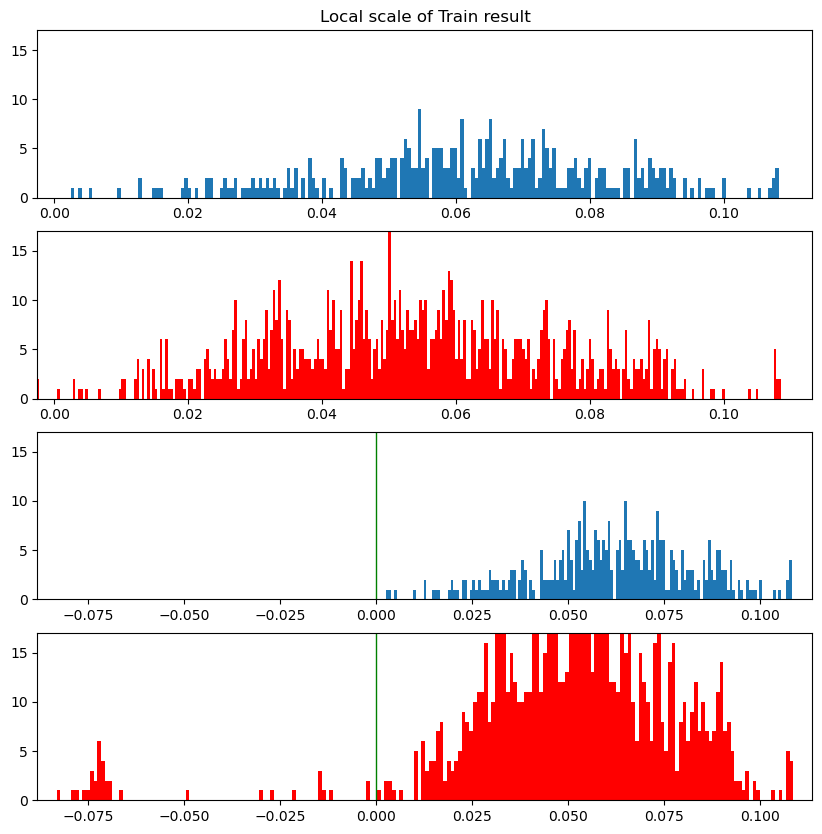

In [48]:
threshold_power10 = 0
visualization(train_pred_proba_power10_avg, test_pred_proba_power10_avg, threshold_power10)

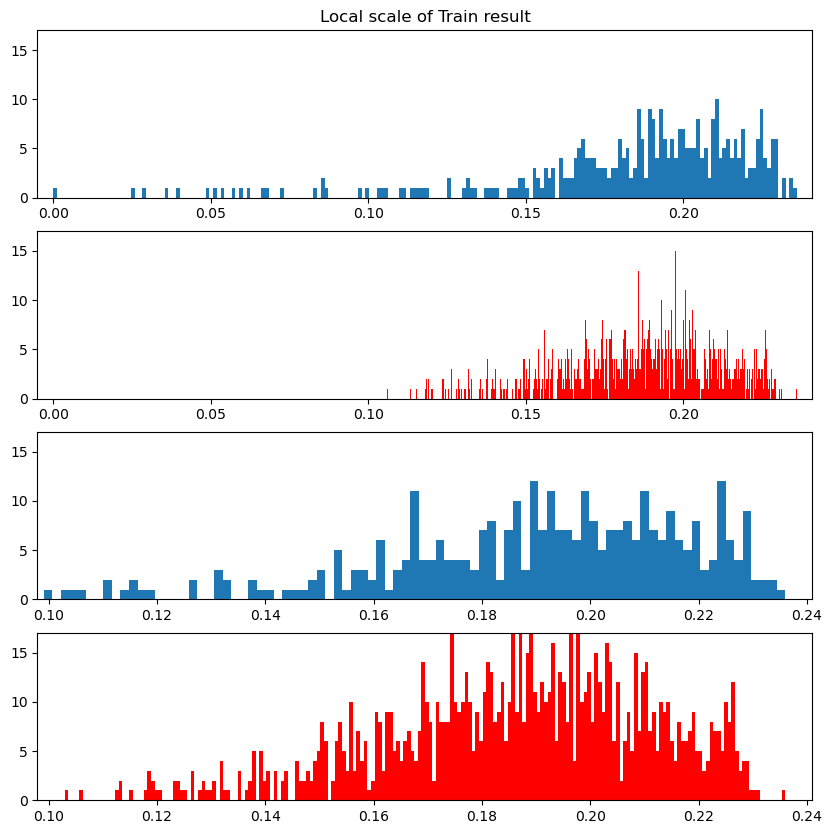

In [49]:
threshold_power20 = 0
visualization(train_pred_proba_power20_avg, test_pred_proba_power20_avg, threshold_power20)

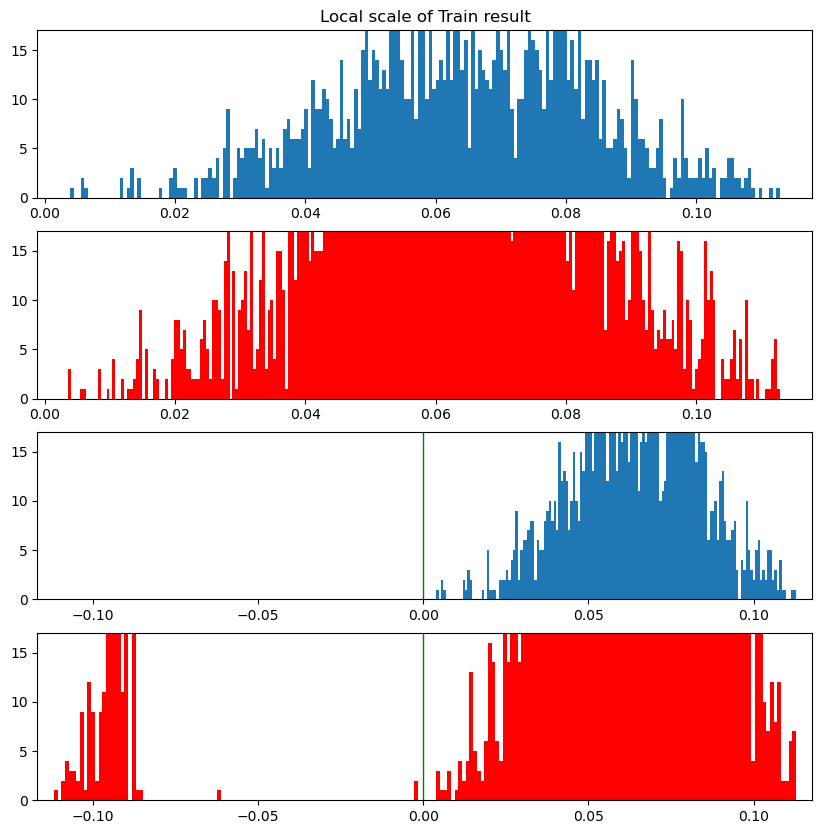

In [50]:
threshold_power30 = 0
visualization(train_pred_proba_power30_avg, test_pred_proba_power30_avg, threshold_power30)

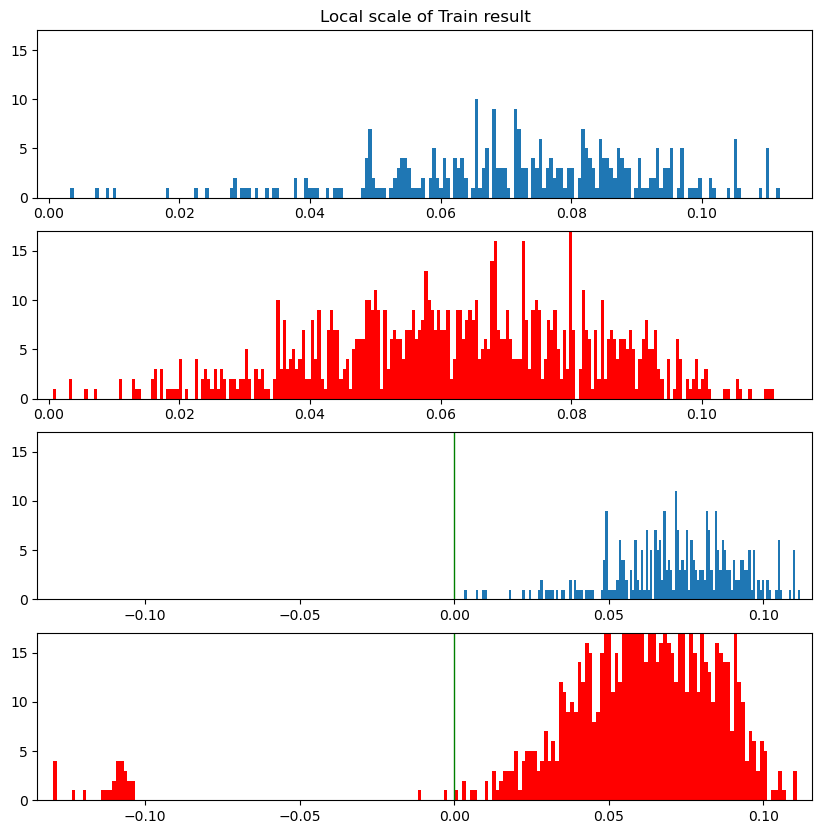

In [51]:
threshold_power50 = 0
visualization(train_pred_proba_power50_avg, test_pred_proba_power50_avg, threshold_power50)

In [52]:
# Custom Threshold
submit = pd.read_csv('./answer_sample.csv')

pred_power10 = (test_pred_proba_power10<threshold_power10)*1
pred_power20 = (test_pred_proba_power20<threshold_power20)*1
pred_power30 = (test_pred_proba_power30<threshold_power30)*1
pred_power50 = (test_pred_proba_power50<threshold_power50)*1

submit.iloc[testData_power10.index, 1] = pred_power10
submit.iloc[testData_power20.index, 1] = pred_power20
submit.iloc[testData_power30.index, 1] = pred_power30
submit.iloc[testData_power50.index, 1] = pred_power50

normal_cnt = submit.label.value_counts()[submit.label.value_counts().index == 0]
outlier_cnt = submit.label.value_counts()[submit.label.value_counts().index == 1]

submit.to_csv(f'../submission/Isolation_N{normal_cnt.values}_O{outlier_cnt.values}.csv', index = False)

In [53]:
submit.label.value_counts()

0    7033
1     356
Name: label, dtype: int64

In [1]:
356/(7033+356)

0.04817972662065232